<a id=0></a>
# 5.Distribution & Relational Plot

---
### [1.SearbornのデータセットからDataFrameを作成 ](#1)
### [2.Distribution Plot ](#2)
### [3.Relational Plot](#3)
### [4. Pandas Supplement : DatetimeIndex & map](#4)
---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
<a id=1></a>
[Topへ](#0)

---
## 1. SearbornのデータセットからDataFrameを作成

* データセット(penguins)を読み込む
* データセットの整理
---

データセット('penguins')を読み込む

In [15]:
df = sns.load_dataset(name='penguins')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [17]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

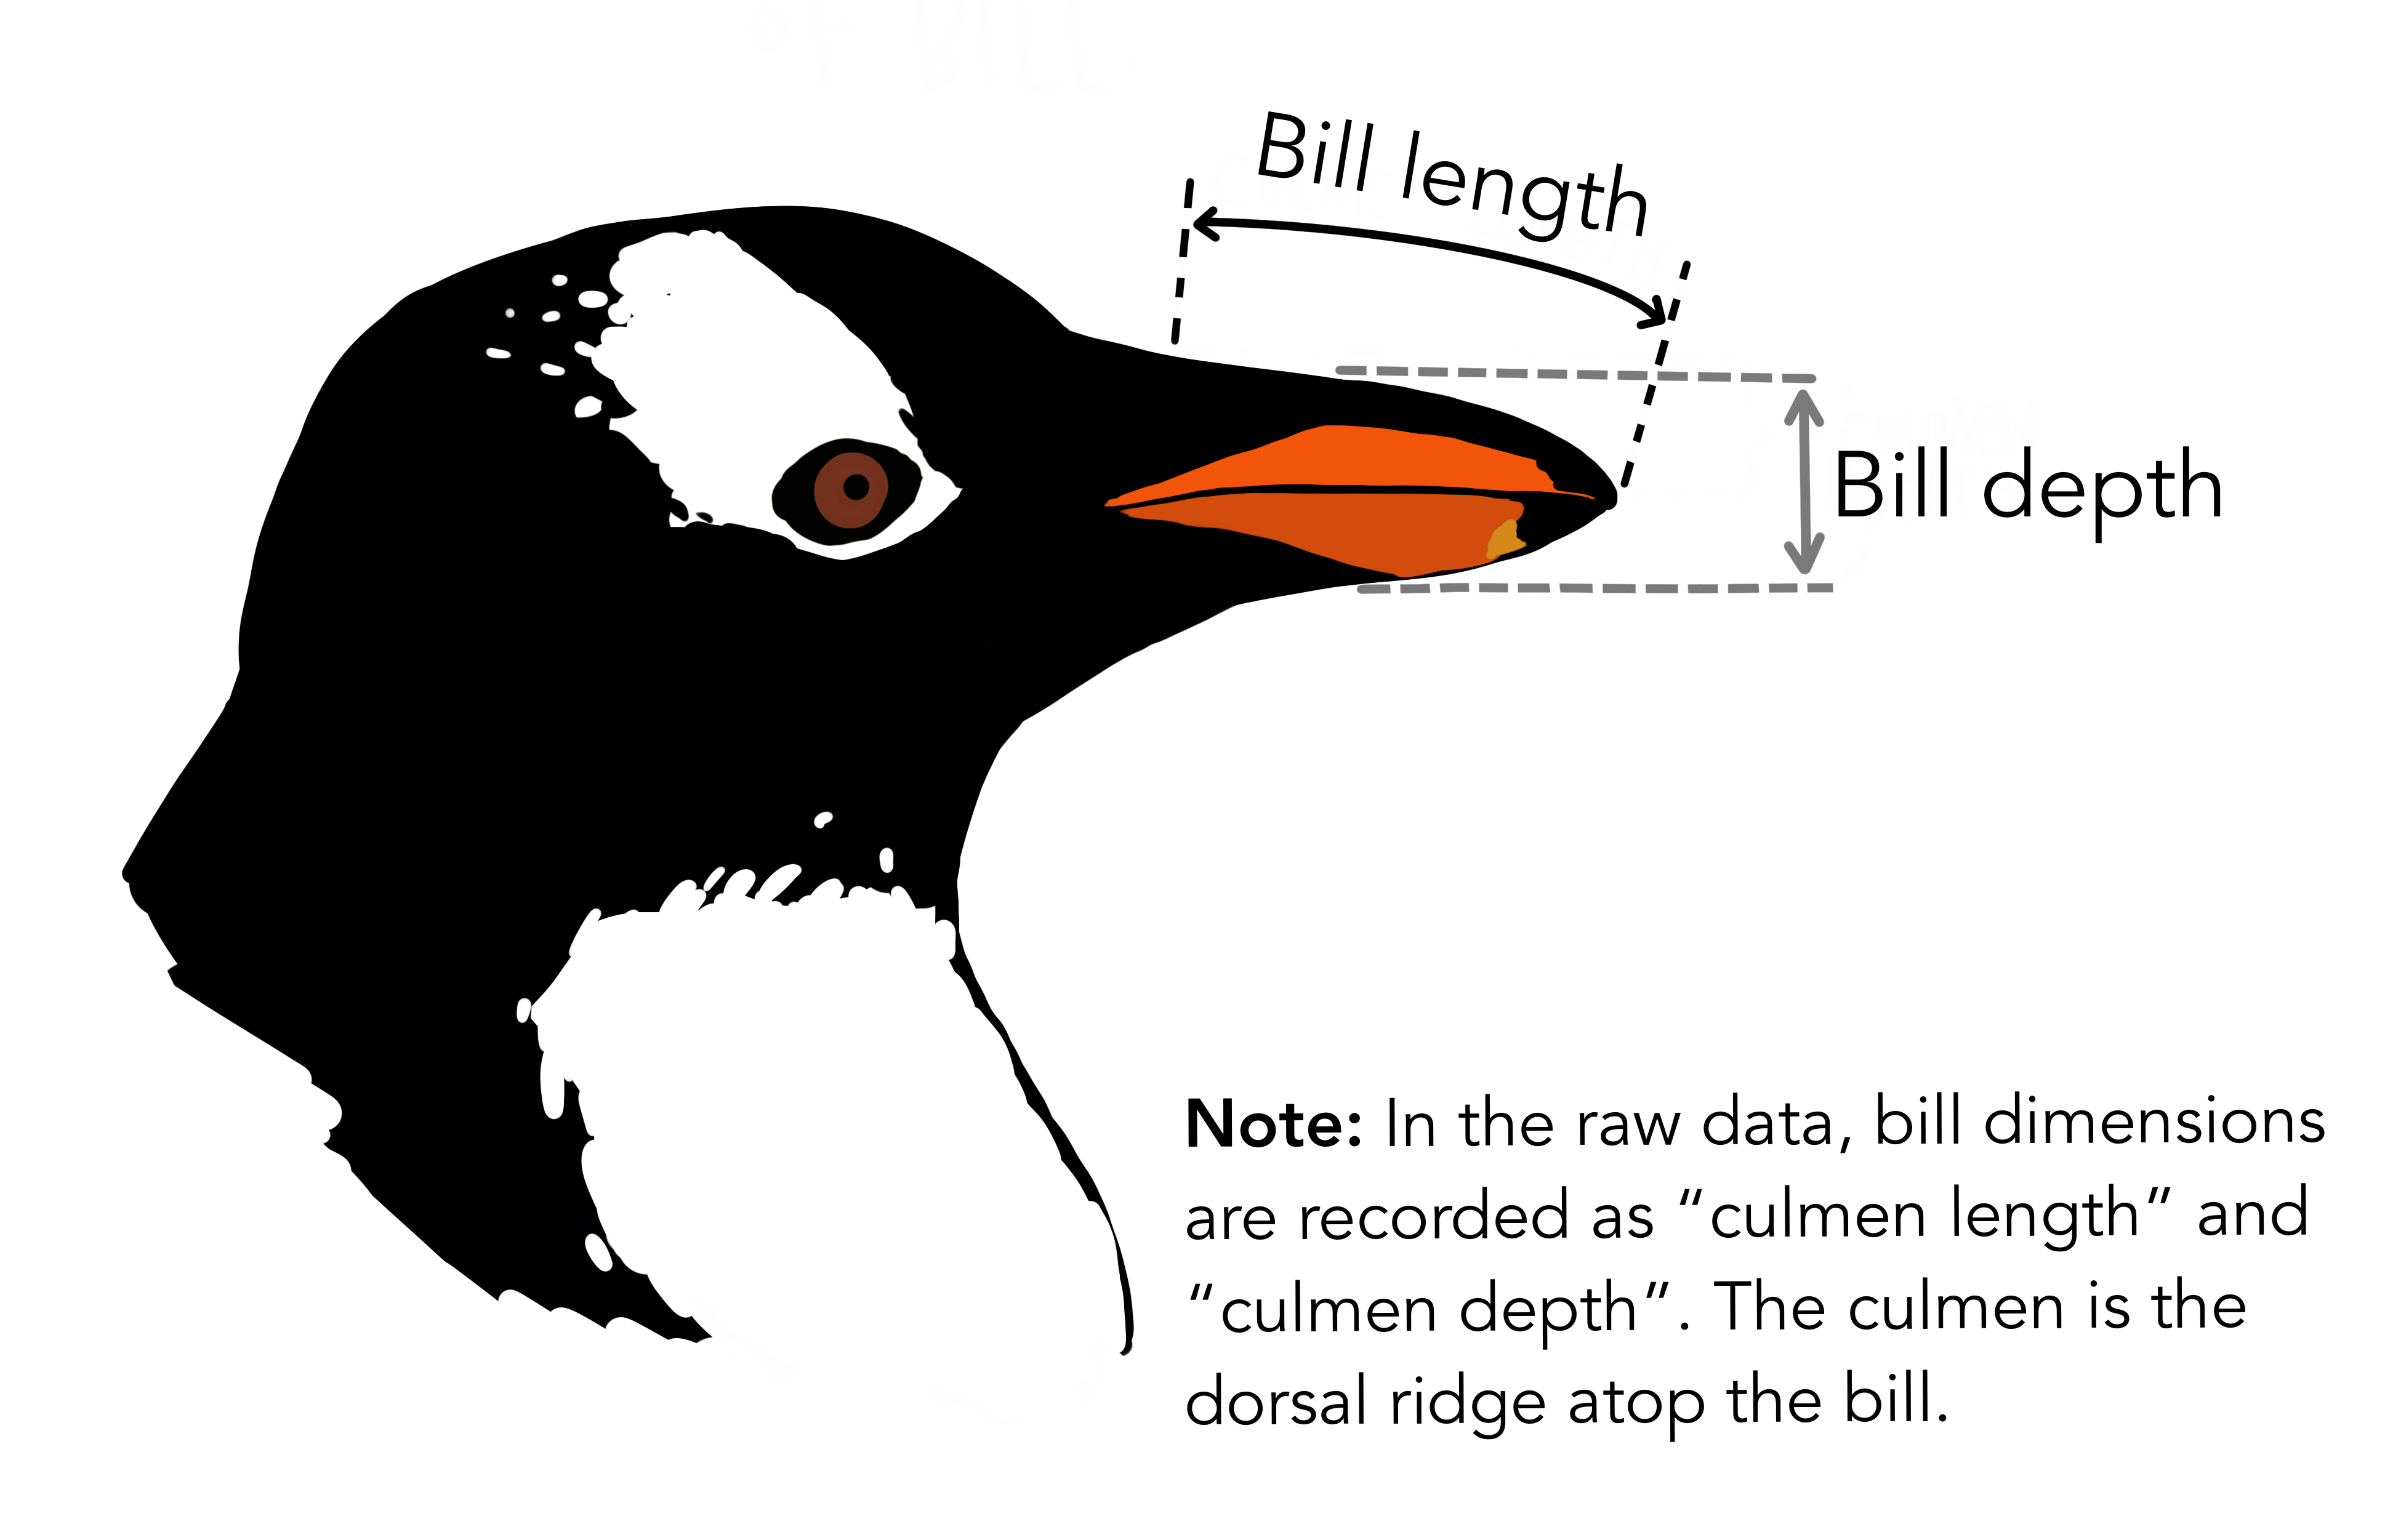

データセットの整理

<p>
    <a href="https://www.kaggle.com/datasets/larsen0966/penguins?sort=votes" target="_blank" rel="noreferrer noopener">
        Kaggle Dataset Penguins のページへ
    </a>
</p>

    bill        : くちばし  
    flipper     : 翼
    body_mass_g : 体重    

In [18]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [19]:
df.dropna(axis=0, inplace=True)

In [20]:
df.isnull().sum().sum()

0

In [21]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [22]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

---
<a id=2></a>
[Topへ](#0)

---
## 2. Distribution Plot

* Seabornテーマの設定
* ヒストプロット : 度数分布を表す。横軸に階級、縦軸に度数
    * **sns.histplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.histplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.histplot のページへ
        </a>
    </p>


* KDEプロット : カーネル密度推定による分布を表す。横軸に階級
    * KDE(カーネル密度推定) : 有限のサンプルから全体の分布を推定
    * **sns.kdeplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.kdeplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.kdeplot のページへ
        </a>
    </p>
---

Seabornテーマの設定

In [29]:
sns.set_theme(context='talk', style='darkgrid', font='MS Mincho')

ヒストプロット

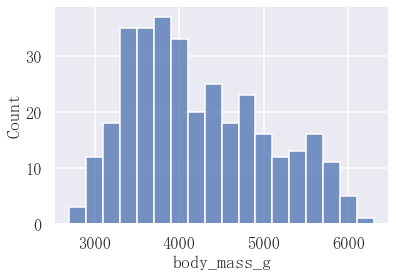

In [33]:
sns.histplot(data=df, x='body_mass_g', bins=18)
plt.show()

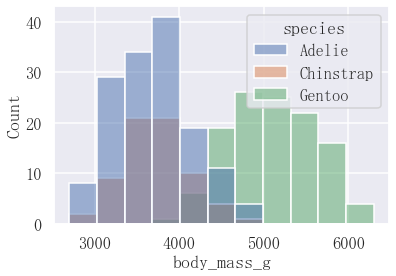

In [34]:
sns.histplot(data=df, x='body_mass_g', hue='species')
plt.show()

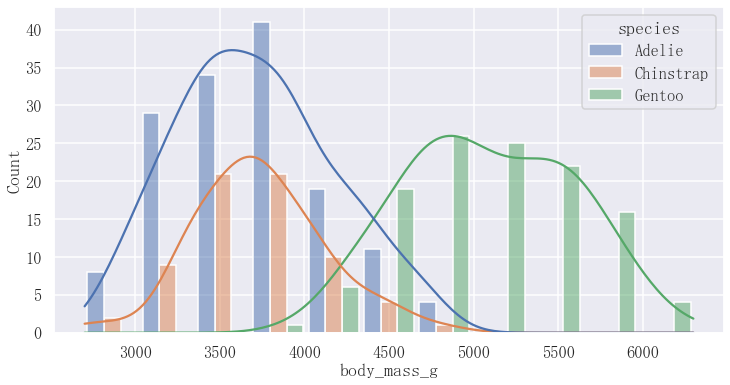

In [51]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='body_mass_g', hue='species', 
             multiple='dodge', shrink=0.9, kde=True)
plt.show()

KDEプロット

C:\Users\arata\AppData\Local\Temp\ipykernel_3588\1087111853.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='body_mass_g', hue='species',


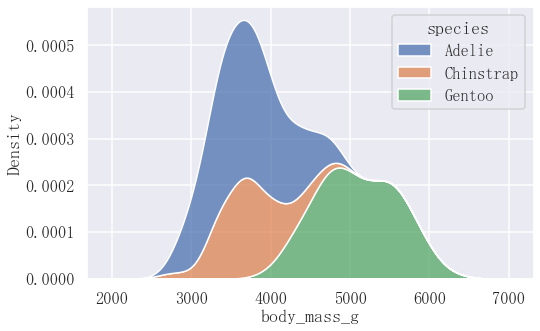

In [61]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='body_mass_g', hue='species', 
            shade=True, multiple='stack')
plt.show()

---
<a id=3></a>
[Topへ](#0)

---
## 3. Relational Plot

* ジョイントプロット : 2変数の関係をスキャッタープロットとKEDプロットで表示（デフォルト設定）
    * **sns.jointplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.jointplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.jointplot のページへ
        </a>
    </p>
    

* スキャッタープロット : 散布図。2変数の関係を点の分布により表す
    * **sns.scatterplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.scatterplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.scatterplot のページへ
        </a>
    </p>


* RELプロット : スキャッタープロットをさらにクラス分けして行・列で表す
    * **sns.relplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.relplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.relplot のページへ
        </a>
    </p>


* REGプロット : スキャッタープロットと線形回帰直線を表す
    * **sns.regplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.regplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.regplot のページへ
        </a>
    </p>


* LMプロット : REGプロットをさらにクラス分けして行・列で表す
    * **sns.lmplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.lmplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.lmplot のページへ
        </a>
    </p>


* ペアプロット : すべての数値データの組み合わせを行い、グリッドで2変数の関係を表す
    * **sns.pairplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.pairplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.pairplot のページへ
        </a>
    </p>
    
    
* ラインプロット : 折れ線グラフ。点をつなぎ、主に連続的変化の推移を表す
    * **sns.lineplot()**
    <p>
        <a href="https://seaborn.pydata.org/generated/seaborn.lineplot.html" target="_blank" rel="noreferrer noopener">
            Seaborn.lineplot のページへ
        </a>
    </p>
    
   

---

ジョイントプロット

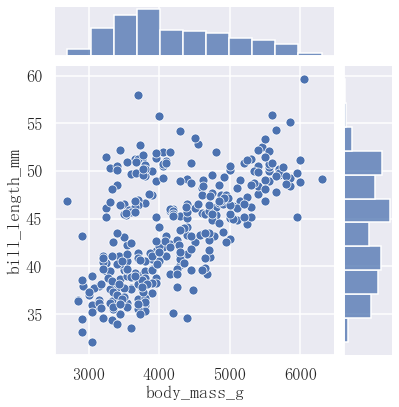

In [62]:
sns.jointplot(data=df, x='body_mass_g', y='bill_length_mm')

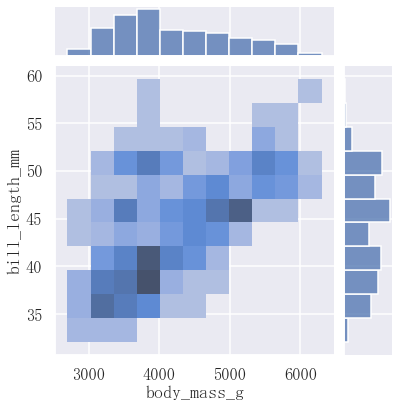

In [63]:
sns.jointplot(data=df, x='body_mass_g', y='bill_length_mm', kind='hist')


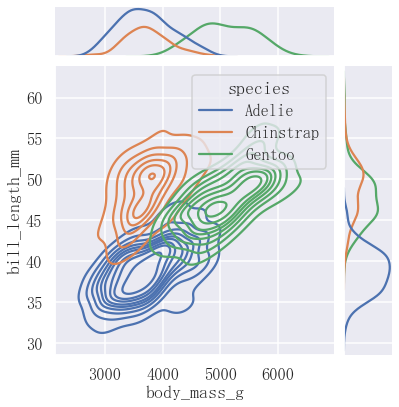

In [65]:
sns.jointplot(data=df, x='body_mass_g', y='bill_length_mm', hue='species', kind='kde')


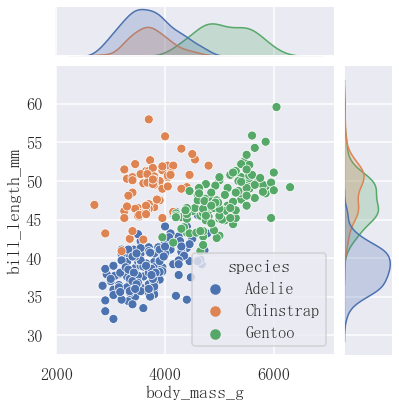

In [66]:
sns.jointplot(data=df, x='body_mass_g', y='bill_length_mm', hue='species', kind='scatter')

スキャッタープロット

In [69]:
df.loc[:, ['bill_length_mm', 'bill_depth_mm']].describe()

,bill_length_mm,bill_depth_mm
count,333.000000,333.000000
mean,43.992793,17.164865
std,5.468668,1.969235
min,32.100000,13.100000
25%,39.500000,15.600000
50%,44.500000,17.300000
75%,48.600000,18.700000
max,59.600000,21.500000


<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

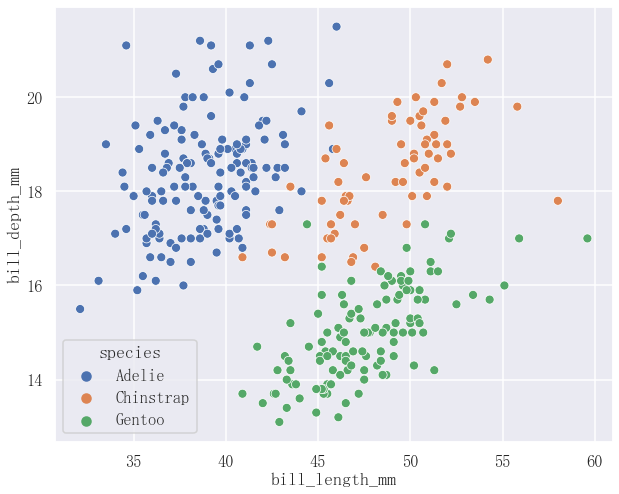

In [70]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm',
                hue='species')

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

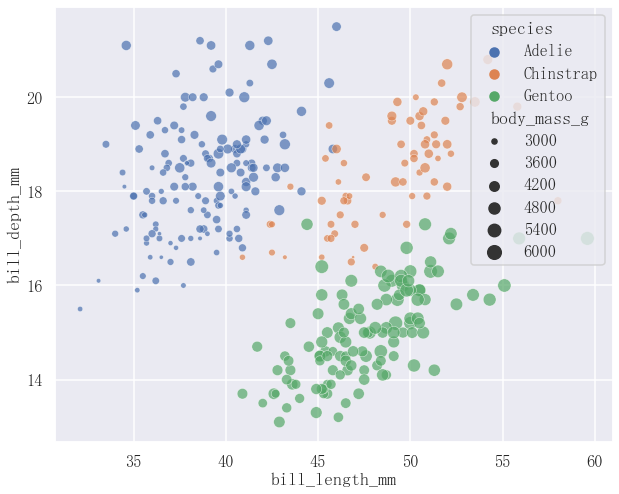

In [73]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm',
                hue='species', alpha=0.7, size='body_mass_g',
                sizes=(10, 200))

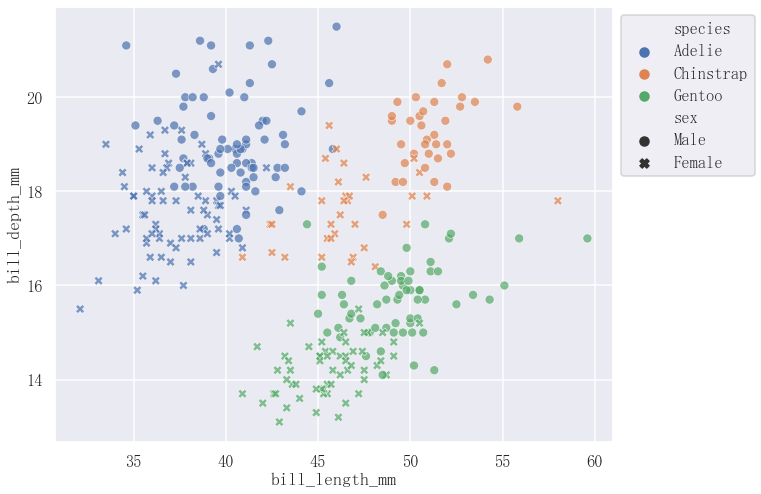

In [81]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm',
                hue='species', alpha=0.7, style='sex')
plt.legend(bbox_to_anchor=(1, 1))


RELプロット

<Figure size 2400x2400 with 0 Axes>

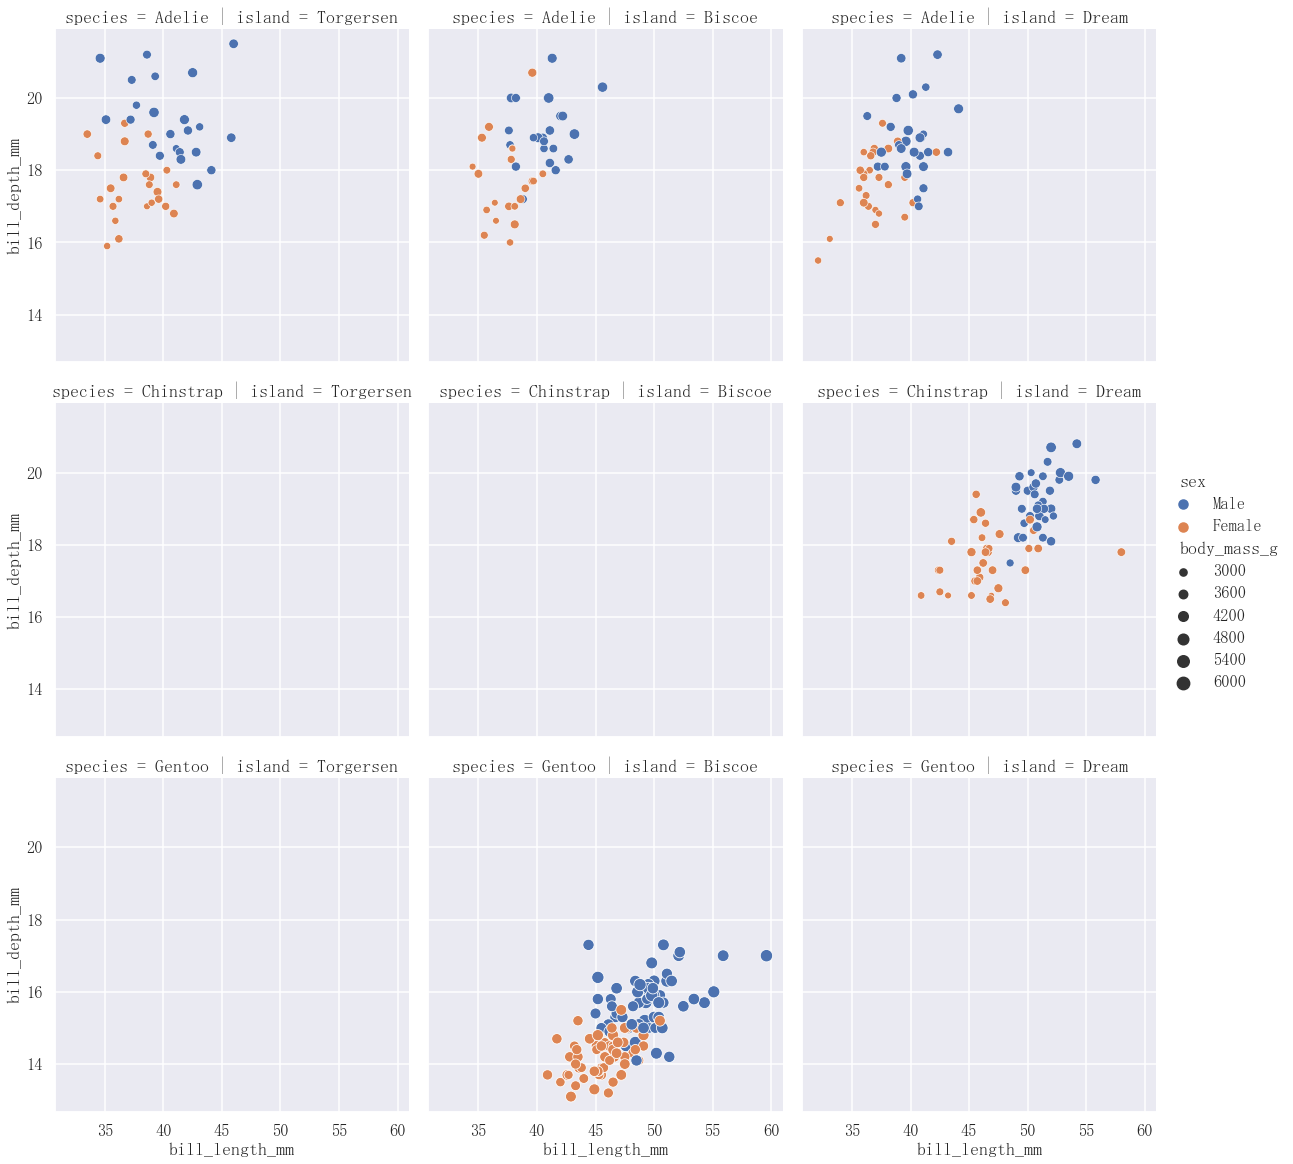

In [102]:
plt.figure(figsize=(12,12), dpi=200)
sns.relplot(data=df, x='bill_length_mm', y='bill_depth_mm',
            hue='sex', col='island', row='species', size='body_mass_g',
            height=5.5, aspect=1)

REGプロット

In [125]:
df.species.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [126]:
adelie = df.groupby('species').get_group('Adelie')
chinstrap = df.groupby('species').get_group('Chinstrap')
gentoo = df.groupby('species').get_group('Gentoo')

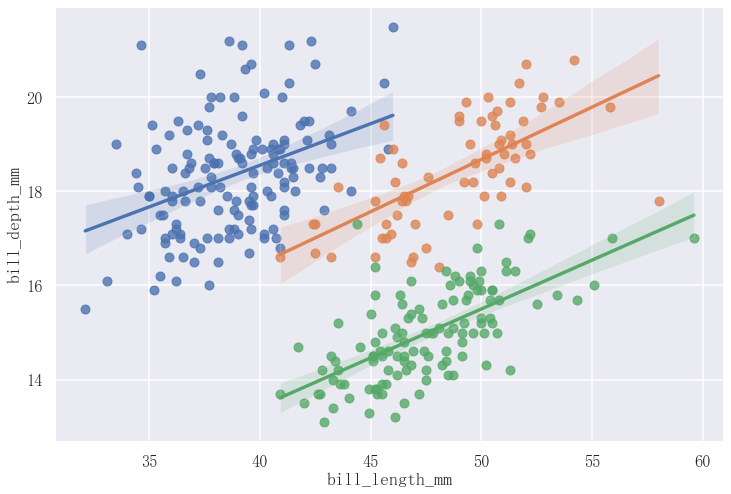

In [130]:
plt.figure(figsize=(12, 8))
sns.regplot(data=adelie, x='bill_length_mm', y='bill_depth_mm')
sns.regplot(data=chinstrap, x='bill_length_mm', y='bill_depth_mm')
sns.regplot(data=gentoo, x='bill_length_mm', y='bill_depth_mm')
plt.show()

LMプロット

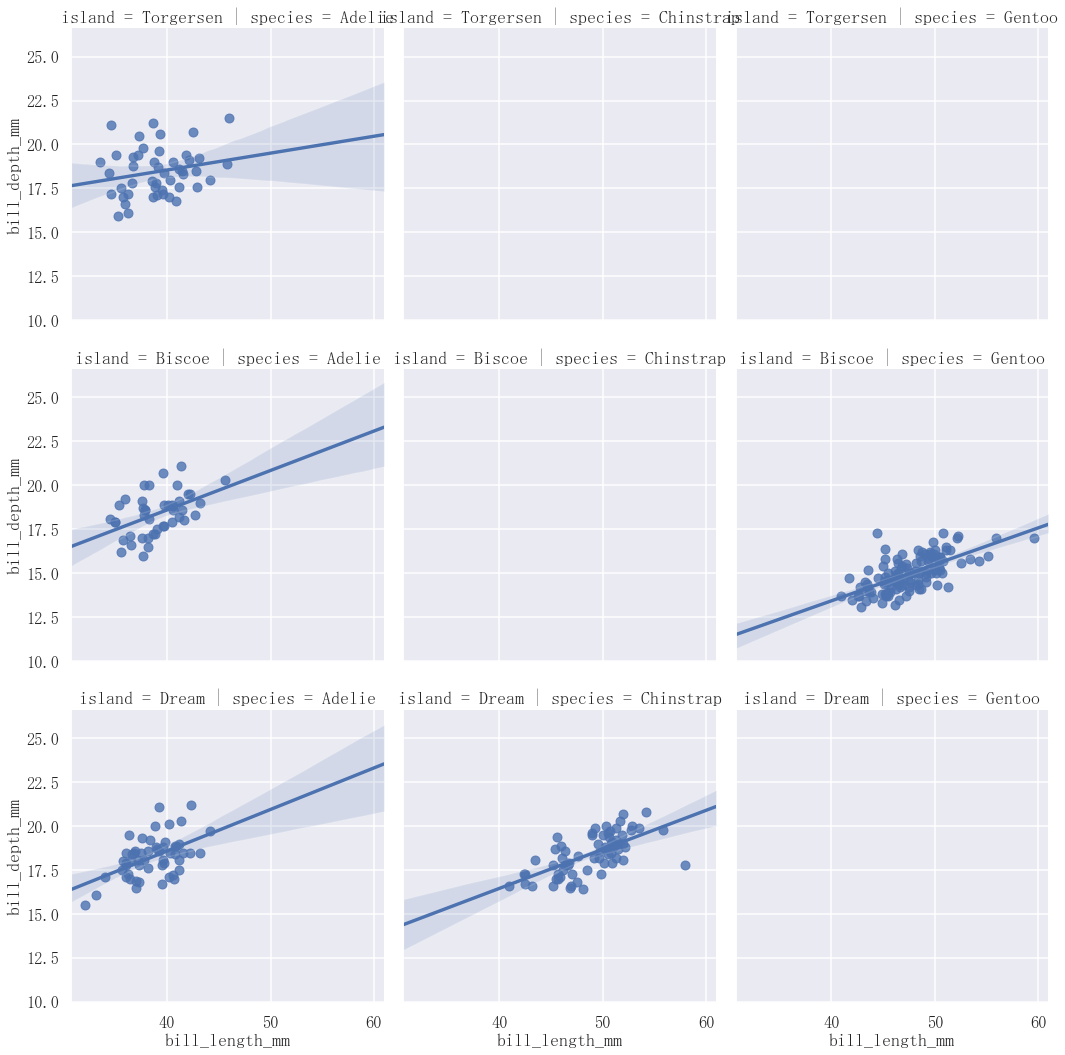

In [133]:
sns.lmplot(data=df, x='bill_length_mm', y='bill_depth_mm',
           col='species', row='island', truncate=False)

ペアプロット

C:\Users\arata\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


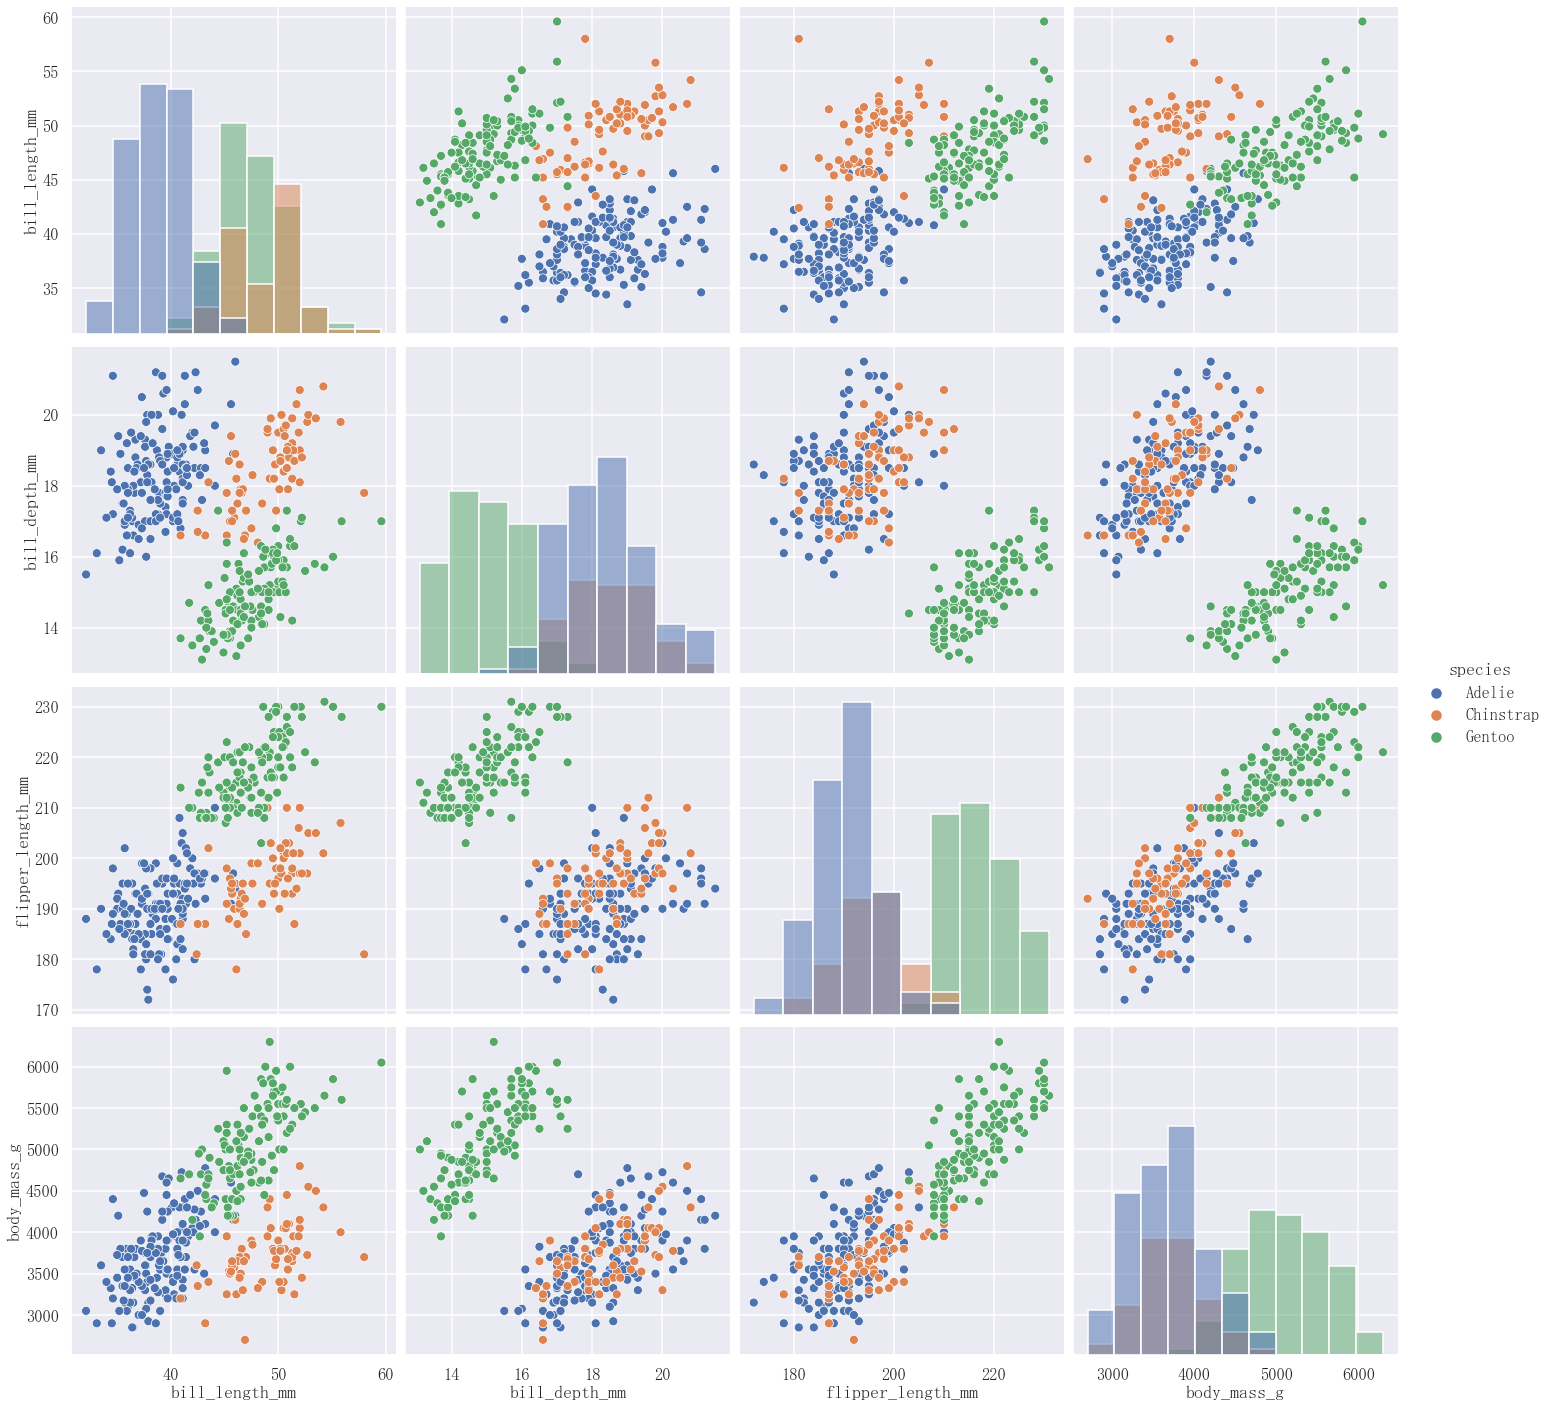

In [122]:
sns.pairplot(data=df, hue='species', diag_kind='hist',
             size=5)

ラインプロット

In [134]:
flights = sns.load_dataset('flights')

In [140]:
flights.tail()

,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


In [138]:
flights.isnull().sum()

year          0
month         0
passengers    0
dtype: int64

<Axes: ylabel='passengers'>

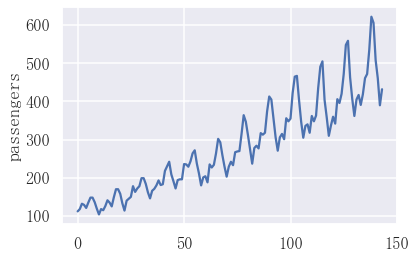

In [139]:
sns.lineplot(data=flights, x=flights.index, y='passengers')

In [146]:
idx = np.arange(0, 144, 12)
years = np.arange(1949, 1961)

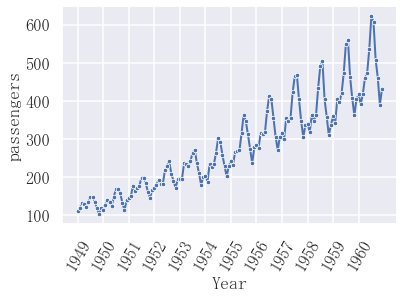

In [153]:
sns.lineplot(data=flights, x=flights.index, y='passengers',
             marker='.', linewidth=2)
plt.xlabel('Year')
plt.xticks(idx, years, rotation=60)
plt.show()

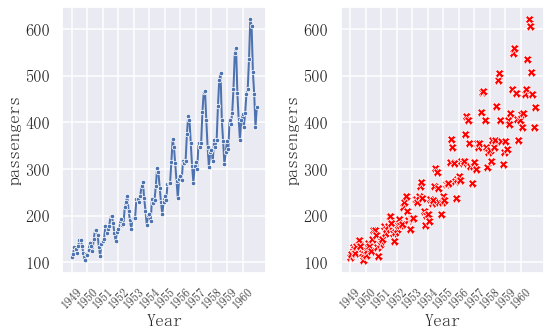

In [164]:
fig, axes = plt.subplots(1, 2, figsize=(8, 5), tight_layout=True)
sns.lineplot(data=flights, x=flights.index, y='passengers',
             marker='.', linewidth=2, ax=axes[0])
axes[0].set_xlabel('Year')
axes[0].set_xticks(idx)
axes[0].set_xticklabels(years, fontsize=12, rotation=45)

sns.lineplot(data=flights, x=flights.index, y='passengers',
             marker='X', linewidth=0, ax=axes[1], markerfacecolor='red')
axes[1].set_xlabel('Year')
axes[1].set_xticks(idx)
axes[1].set_xticklabels(years, fontsize=12, rotation=45)

plt.show()


In [169]:
flights_jj = flights[flights['month'].isin(['Jan', 'Jul'])].reset_index()

In [171]:
flights_jj.head()

,index,year,month,passengers
0,0,1949,Jan,112
1,6,1949,Jul,148
2,12,1950,Jan,115
3,18,1950,Jul,170
4,24,1951,Jan,145


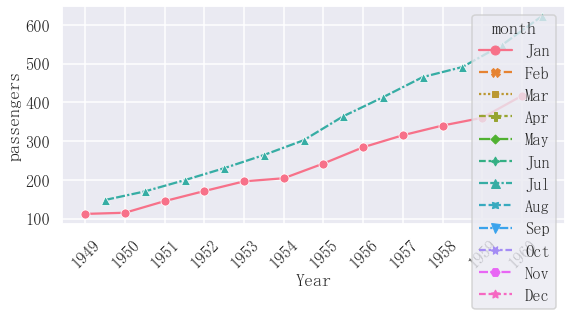

In [177]:
plt.figure(figsize=(9, 4))
sns.lineplot(data=flights_jj, x=flights_jj.index, y='passengers', hue='month',
             style='month', markers=True)
plt.xlabel('Year')
plt.xticks(np.arange(0, 24, 2), np.arange(1949, 1961), rotation=45)
plt.show()

In [178]:
flights_jj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   index       24 non-null     int64   
 1   year        24 non-null     int64   
 2   month       24 non-null     category
 3   passengers  24 non-null     int64   
dtypes: category(1), int64(3)
memory usage: 1.1 KB


In [179]:
flights_jj['month'] = flights_jj['month'].astype(object)

In [181]:
flights_jj.dtypes

index          int64
year           int64
month         object
passengers     int64
dtype: object

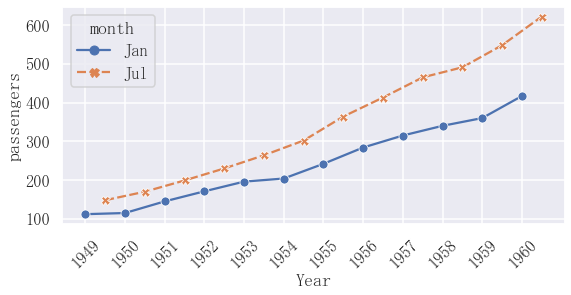

In [182]:
plt.figure(figsize=(9, 4))
sns.lineplot(data=flights_jj, x=flights_jj.index, y='passengers', hue='month',
             style='month', markers=True)
plt.xlabel('Year')
plt.xticks(np.arange(0, 24, 2), np.arange(1949, 1961), rotation=45)
plt.show()

---
<a id=4></a>
[Topへ](#0)

---
## 4. Pandas Supplement : DatetimeIndex & map

* Series.map()を使いJanを1に、Febを2に
* 文字列を結合して新しいカラムを作る
* to_datetimeでDatetime型に変更
* Datetimeの機能で情報を取得する
* ある時点からの差を取得する
* DatetimeIndexにしてresamplingを行う
* shiftを使って変化量を算出
---

Series.map()を使いJanを1に、Febを2に  

※ Seriesの各要素にはmapもしくはapply、DataFrameの行列にはapply、DataFrameの各要素に対してはapplymap  
※ for文を使うよりはずっと早い  
※ loc, ilocでの書き換えで対応しづらいような場合、簡潔に記述したい場合に使用する  
    

In [183]:
month_dict ={'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

文字列を結合して新しいカラムを作る

In [184]:
flights['month'].map(month_dict)

0       1
1       2
2       3
3       4
4       5
       ..
139     8
140     9
141    10
142    11
143    12
Name: month, Length: 144, dtype: category
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]

to_datetimeでDatetime型に変更

In [186]:
s = flights['month'].map(month_dict).astype(int)
s

0       1
1       2
2       3
3       4
4       5
       ..
139     8
140     9
141    10
142    11
143    12
Name: month, Length: 144, dtype: int32

Datetimeの機能で情報を取得する

ある時点からの差を取得する

DatetimeIndexにしてresamplingを行う

shiftを使って変化量を算出

---
 <a id=4></a>
[Topへ](#0)

---
## 以上
    
---